Rank-Abundance Curves for Analyzing Biological Communities

Rank-abundance curves (RACs) are graphical representations used in ecology to assess species diversity and community
structure. They plot the relative abundance of each species (y-axis, often log-scaled) against its rank 
(x-axis, from most to least abundant).

Key Applications & Insights:
*Diversity Assessment: RACs visualize species richness (number of species) and evenness (equitability of abundances),
complementing indices like Shannon or Simpson.

*Community Structure: Steep curves indicate dominance by few species, while flatter curves suggest more equitable
distributions.

*Disturbance & Stability: Shifts in curve shape (e.g., steeper slopes post-disturbance) reveal ecological impacts
or recovery.

*Comparative Studies: Enables direct comparison of communities across habitats, time, or environmental gradients.

Some advantages over indices are that allow an intuitive visualization, unlike single-value indices,
RACs retain species-level data, showing which species dominate or decline; are sensitive to change  and can detect
subtle shifts in community composition that indices might average out.

As limitations, RACs' interpretation is qualitative and often must be paired with additional statistical tests.
In addition, are sensitive to under-sampling of rare species.



To implement rank-abundace curves using Python, the first step is  to import libraries pandas,
numpy, matplotlib.pyplot and seaborn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Plot style configuration
Here we define some graphical parameter to create plots

In [ ]:
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

Step 1: Loading and preparing data from "aedes.txt
Reading file

In [ ]:
df = pd.read_csv("aedes.txt", sep="\t", header=0)


        date  month  ID season     hr rep gender             species  count  \
0  1/28/2020  Enero   1  norte  13:00  B1  Aedes   Ae.taeniorhynchus    252   
1  1/28/2020  Enero   1  norte  13:00  B2  Aedes   Ae.taeniorhynchus    335   
2  1/28/2020  Enero   1  norte  13:00  B3  Aedes   Ae.taeniorhynchus    154   
3  1/28/2020  Enero   1  norte  13:00  B1  Aedes  Ae.angustivitattus      1   
4  1/28/2020  Enero   1  norte  13:00  B2  Aedes  Ae.angustivitattus      1   

    Veg  vgt  
0  SMMG    2  
1  SMMG    2  
2  SMMG    2  
3  SMMG    2  
4  SMMG    2  

Available columns: ['date', 'month', 'ID', 'season', 'hr', 'rep', 'gender', 'species', 'count', 'Veg', 'vgt']

Unique values in 'season': ['norte' 'dry' 'rainy']


Data structure verifiaction

In [ ]:
print(df.head())
print("\nAvailable columns:", df.columns.tolist())
print("\nUnique values in 'season':", df['season'].unique())

Step 2: Data processing
The original data are in dataframe format and we need to have a matrix format.
We get this by groupping data by species and season, and adding up te values in the variable "count"

In [ ]:
df_grouped = df.groupby(['species', 'season'])['count'].sum().reset_index()

df_pivot = df_grouped.pivot(index='season', columns='species', values='count').fillna(0)


Season abundance matrix:
species  Ae.angustivitattus  Ae.egypti  Ae.fulvus  Ae.scapularis  Ae.serratus  \
season                                                                          
dry                       0          0          0              0            0   
norte                   240         64          0             14           55   
rainy                    28         21          2             13           64   

species  Ae.taeniorhynchus  
season                      
dry                   4163  
norte                10954  
rainy                 4385  


Then we pivot table to set species in columns and season in rows

In [ ]:
df_pivot = df_grouped.pivot(index='season', columns='species', values='count').fillna(0)

Finally, we drop species that don't appear in any season

In [ ]:
df_pivot = df_pivot.loc[:, (df_pivot > 0).any(axis=0)]

print("\nSeason abundance matrix:")
print(df_pivot)

Step 3: Species Rank-Abundance function
At this point we have to sort species abundance at descending order, put these data in a dataframe and plot.

In [ ]:
def plot_rank_abundance(data, title):
    #Sort species from higher to lower abundance
    ranked = data.sort_values(ascending=False)
    ranked = ranked[ranked > 0]  # Filter species abundance > 0
    
    #Creating dataframe for plotting
    plot_df = pd.DataFrame({
        'Species': ranked.index,
        'Abundance': ranked.values,
        'Relative_abundance': ranked.values / ranked.values.sum()
    })
    plot_df['Rank'] = range(1, len(plot_df) + 1)
    
    #Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(plot_df['Rank'], plot_df['Abundance'], 
             marker='o', linestyle='-', linewidth=2, markersize=8)
    
    #Adding labels
    for i, row in plot_df.iterrows():
        plt.text(row['Rank'], row['Abundance'], row['Species'], 
                 fontsize=9, ha='left', va='bottom', rotation=45)
    
    #Customization
    plt.title(f'Rank-Abundance curve - {title}', fontsize=14)
    plt.xlabel('Rank (1 = more abundant)', fontsize=12)
    plt.ylabel('Abundance', fontsize=12)
    plt.yscale('log')  # Log scale for better visualization
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(plot_df['Rank'])
    plt.tight_layout()

Then we get the Rank-Abundance curve for each season

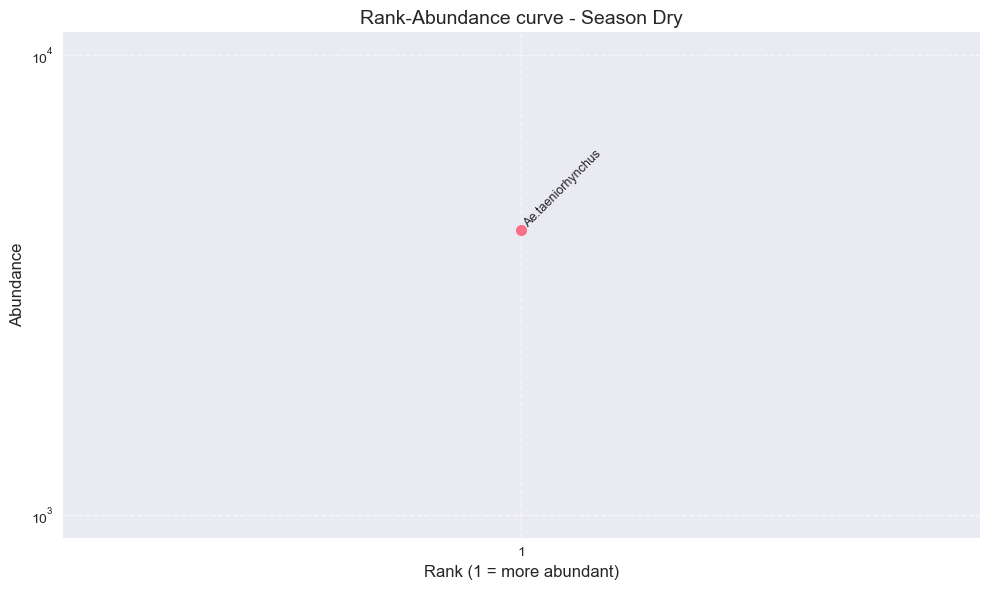

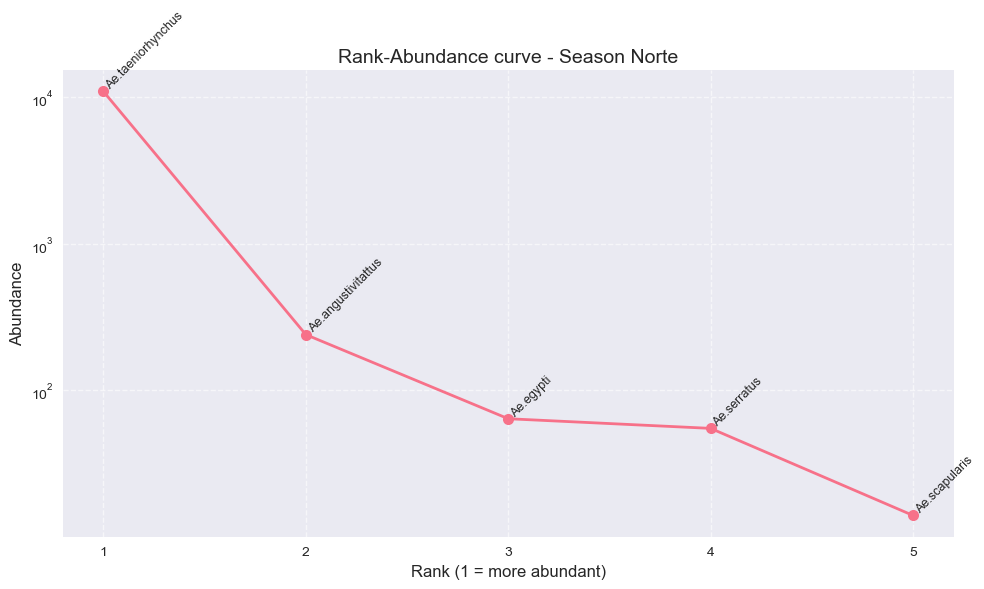

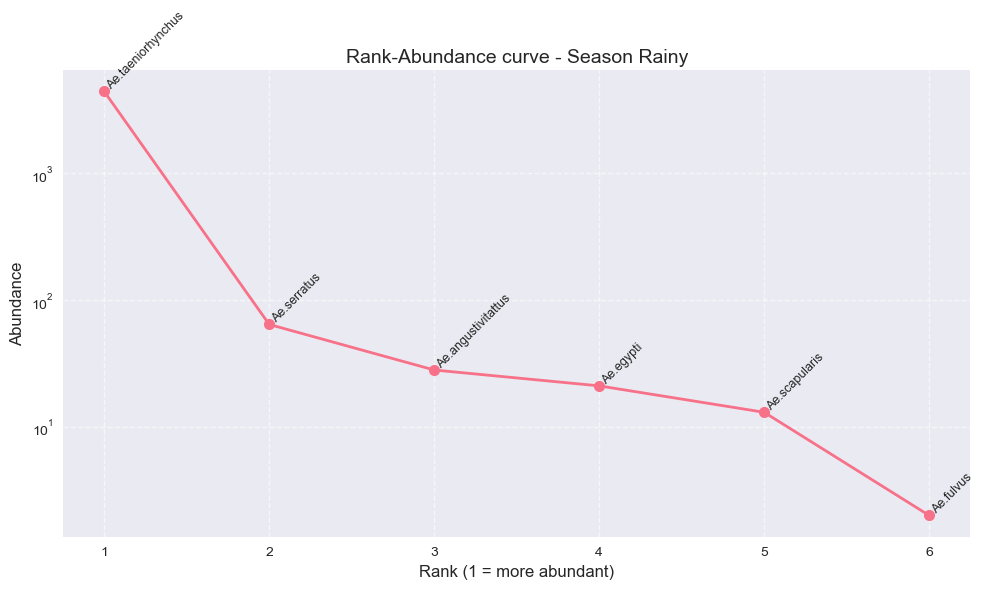

In [ ]:
for season in df_pivot.index:
    season_data = df_pivot.loc[season]
    plot_rank_abundance(season_data, f'Season {season.capitalize()}')
    plt.show()

Step 5: Put all curves within a single plot
For practicity we can punt all the three curves together

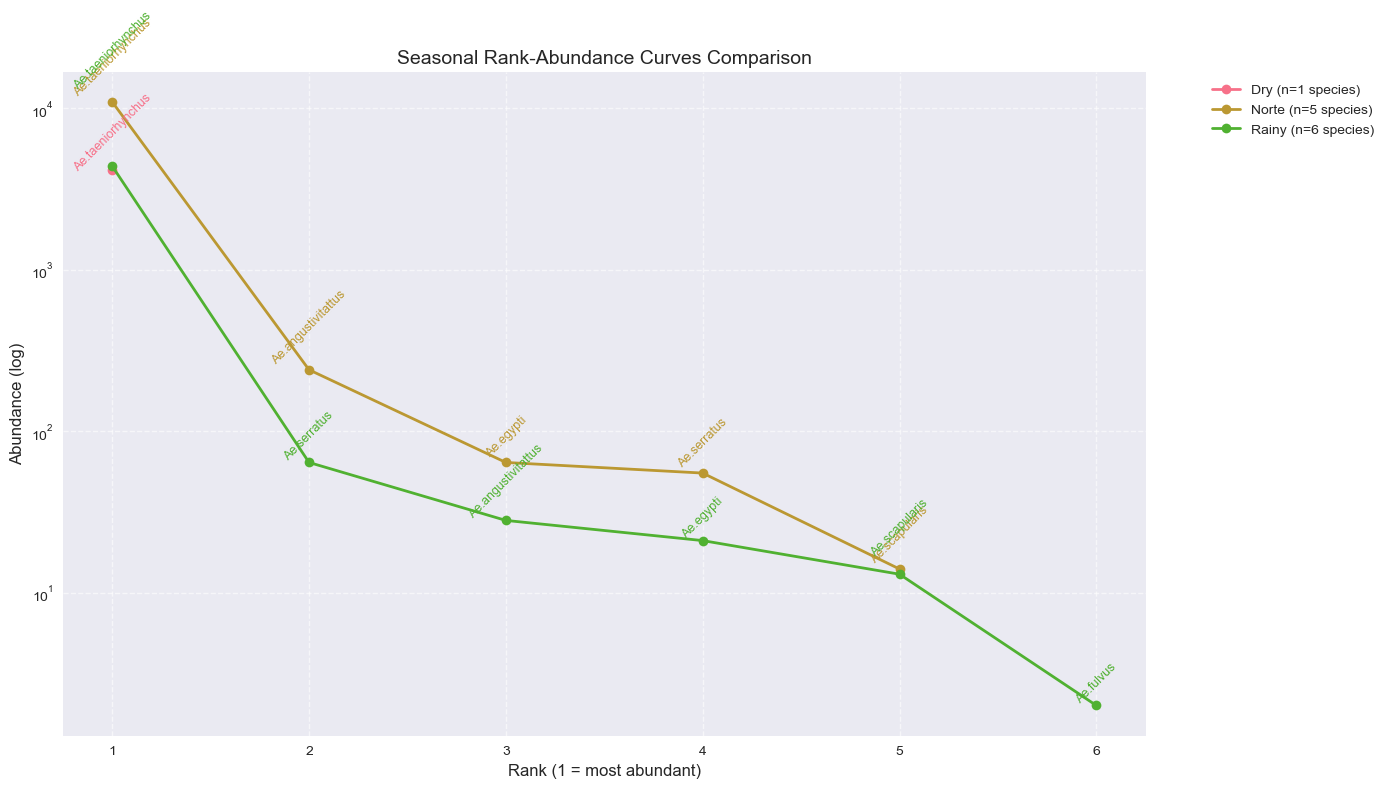

In [ ]:

range = __builtins__.range

#Set the plot size and define labels position
plt.figure(figsize=(14, 8))

label_positions = {}

for season in df_pivot.index:
    season_data = df_pivot.loc[season].sort_values(ascending=False)
    season_data = season_data[season_data > 0]
    
    #Define plot aesthetic
    line, = plt.plot(
        list(range(1, len(season_data)+1)), 
        season_data.values,
        marker='o',
        linestyle='-',
        linewidth=2,
        label=f'{season.capitalize()} (n={len(season_data)} species)'
    )
    
    #Define rango as plotting variable
    for rango, (species, abundance) in enumerate(season_data.items(), start=1):
        #Adjusting vertical position
        y_offset = 1.05 if season == 'norte' else 0.95 if season == 'dry' else 1.0
        y_pos = abundance * y_offset
        
        #verify existing position
        key = (rango, species)
        if key in label_positions:
            y_pos = max(y_pos, label_positions[key] * 1.1)
        
        label_positions[key] = y_pos
        
        plt.text(
            rango,
            y_pos,
            species,
            fontsize=9,
            ha='center',
            va='bottom',
            rotation=45,
            color=line.get_color()
        )

plt.title('Seasonal Rank-Abundance Curves Comparison', fontsize=14)
plt.xlabel('Rank (1 = most abundant)', fontsize=12)
plt.ylabel('Abundance (log)', fontsize=12)
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()